# ETL Project - Crime Data Analysis

In [2]:
#Import all the dependencies

import pandas as pd
import datetime as dt
import sqlalchemy
import matplotlib.pyplot as plt
from sqlalchemy.orm import Session
from sqlalchemy.orm import join
from sqlalchemy import create_engine, func
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float
import seaborn as sns
%matplotlib inline

In [3]:
pd.options.mode.chained_assignment =None 

# EXTRACT- Data from the csv files

In [4]:
#import the data in csv
BostonCrimeData = pd.read_csv("Resources/crime 2.csv" , encoding="ISO-8859-1" , low_memory=False)

In [5]:
BostonCrimeData.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [6]:
#import the data in csv
LACrimeData = pd.read_csv("Resources/Crime_Data_2010_2017.csv", encoding="ISO-8859-1")
LACrimeData.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


# TRANSFORM - Boston Data set

In [7]:
BostonCrimeData.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [8]:
NewBostonCrimeData = BostonCrimeData[["INCIDENT_NUMBER",
                                      "OFFENSE_CODE",
                                      "OFFENSE_CODE_GROUP",
                                      "OFFENSE_DESCRIPTION", 
                                      "OCCURRED_ON_DATE", 
                                      "STREET", 
                                      "Lat",
                                      "Long"
                                     ]]

In [9]:
NewBostonCrimeData.reset_index(drop=True, inplace=True)
NewBostonCrimeData.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,OCCURRED_ON_DATE,STREET,Lat,Long
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,2018-10-03 20:13:00,ARLINGTON ST,42.262608,-71.121186
1,I182080053,3201,Property Lost,PROPERTY - LOST,2018-08-30 20:00:00,ALLSTON ST,42.352111,-71.135311
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,2018-10-03 19:20:00,DEVON ST,42.308126,-71.076930
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,2018-10-03 20:00:00,CAMBRIDGE ST,42.359454,-71.059648
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,2018-10-03 20:49:00,PRESCOTT ST,42.375258,-71.024663


In [10]:
# Filtering the September crimes of Boston City
SeptBosCrimes = NewBostonCrimeData[(NewBostonCrimeData["OCCURRED_ON_DATE"]>="2015-09-01") & (NewBostonCrimeData["OCCURRED_ON_DATE"]<="2015-09-30")]

In [11]:
# Number of count of Boston September crimes
SeptBosCrimes.count()

INCIDENT_NUMBER        8189
OFFENSE_CODE           8189
OFFENSE_CODE_GROUP     8189
OFFENSE_DESCRIPTION    8189
OCCURRED_ON_DATE       8189
STREET                 7960
Lat                    7841
Long                   7841
dtype: int64

In [12]:
# Drop the Nan values in the columns
CleanedSeptBosCrimes = SeptBosCrimes.dropna(how="any")
CleanedSeptBosCrimes.count()

INCIDENT_NUMBER        7839
OFFENSE_CODE           7839
OFFENSE_CODE_GROUP     7839
OFFENSE_DESCRIPTION    7839
OCCURRED_ON_DATE       7839
STREET                 7839
Lat                    7839
Long                   7839
dtype: int64

In [13]:
tempOccDate = pd.to_datetime(CleanedSeptBosCrimes["OCCURRED_ON_DATE"]).dt.strftime('%m-%d-%Y')

In [14]:
CleanedSeptBosCrimes.replace(CleanedSeptBosCrimes["OCCURRED_ON_DATE"] ,tempOccDate)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,OCCURRED_ON_DATE,STREET,Lat,Long
5510,I182074094,2629,Harassment,HARASSMENT,2015-09-14 09:31:00,COLUMBIA RD,42.315142,-71.067047
45525,I182031354,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,2015-09-15 11:00:00,ALLSTON ST,42.344388,-71.140586
79421,I172102851,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,2015-09-01 00:00:00,TOPLIFF ST,42.304435,-71.068629
82858,I172099191,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,2015-09-10 09:00:00,SEMONT RD,42.290897,-71.061567
100205,I172080681,1107,Fraud,FRAUD - IMPERSONATION,2015-09-27 15:19:00,COLORADO ST,42.278824,-71.097772
103075,I172077677,3110,Police Service Incidents,SERVICE TO OTHER PD OUTSIDE OF MA.,2015-09-01 12:00:00,DENTON TER,42.280230,-71.133143
104322,I172076361,619,Larceny,LARCENY ALL OTHERS,2015-09-01 00:00:00,VFW PKWY,42.268975,-71.171831
104811,I172075854,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,2015-09-02 09:00:00,WAUMBECK ST,42.314013,-71.086353
141415,I172036765,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,2015-09-07 12:00:00,EVANS ST,42.281455,-71.083510
151582,I172025850,2629,Harassment,HARASSMENT,2015-09-15 07:30:00,COLORADO ST,42.278824,-71.097772


In [15]:
# Sort the incidents by the "OCCURRED_ON_DATE" ascending

BosIncident_detailsDF = CleanedSeptBosCrimes[[ "INCIDENT_NUMBER", 
                                             "OCCURRED_ON_DATE",
                                            "STREET", 
                                            "OFFENSE_CODE" 
                                            ]].sort_values("OCCURRED_ON_DATE", ascending=True)

In [16]:
BosIncident_detailsDF["CITY"]  ="Boston"
BosIncident_detailsDF.head()

,INCIDENT_NUMBER,OCCURRED_ON_DATE,STREET,OFFENSE_CODE,CITY
276812,I152105605,2015-09-01 00:00:00,CLEVELAND PL,2629,Boston
306985,I152072583,2015-09-01 00:00:00,SELDEN ST,3114,Boston
300426,I152079669,2015-09-01 00:00:00,THOMAS PARK,3115,Boston
202364,I162077971,2015-09-01 00:00:00,COLONEL MICHAEL J. MCDONO,1106,Boston
193846,I162087104,2015-09-01 00:00:00,FILOMENA RD,1107,Boston


In [17]:
BosOffense_detailsDF = CleanedSeptBosCrimes[["OFFENSE_CODE","OFFENSE_DESCRIPTION"]]
BosOffense_detailsDF.head()

,OFFENSE_CODE,OFFENSE_DESCRIPTION
5510,2629,HARASSMENT
45525,1102,FRAUD - FALSE PRETENSE / SCHEME
79421,1102,FRAUD - FALSE PRETENSE / SCHEME
82858,1102,FRAUD - FALSE PRETENSE / SCHEME
100205,1107,FRAUD - IMPERSONATION


In [18]:
BosLocation_DetailsDF = CleanedSeptBosCrimes[["STREET", "Lat" , "Long"]]

BosLocation_DetailsDF["City"] = "Boston"
BosLocation_DetailsDF.head()

,STREET,Lat,Long,City
5510,COLUMBIA RD,42.315142,-71.067047,Boston
45525,ALLSTON ST,42.344388,-71.140586,Boston
79421,TOPLIFF ST,42.304435,-71.068629,Boston
82858,SEMONT RD,42.290897,-71.061567,Boston
100205,COLORADO ST,42.278824,-71.097772,Boston


# TRANSFORM - Los Angeles Data 

In [19]:
# Extract September 2015 data
SeptLACrimes = LACrimeData[(LACrimeData["Date Occurred"]>= "09/01/2015") & (LACrimeData["Date Occurred"]<="09/30/2015")]
SeptLACrimes.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
119,101321103,09/16/2010,09/15/2010,2200,13,Newton,1321,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,2400 S GRAND AV,NaN,"(34.0283, -118.2711)"
120,101321918,09/28/2010,09/23/2010,2000,13,Newton,1322,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,ADAMS,MAPLE,"(34.0225, -118.2633)"
125,101420432,09/08/2010,09/03/2010,1030,14,Pacific,1431,330,BURGLARY FROM VEHICLE,0344 1300,...,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,HORIZON,PACIFIC,"(33.9886, -118.473)"
148,101717325,09/03/2010,09/03/2010,1700,17,Devonshire,1799,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,HASKELL,ROSCOE,"(34.2214, -118.4756)"
182,102117936,09/25/2010,09/25/2010,2025,21,Topanga,2134,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,7400 SAUSALITO AV,NaN,"(34.2047, -118.6158)"


In [20]:
# Transforming the Location column in "Lat" and "Long" columns

Lat =[]
Long = []

for loc in SeptLACrimes["Location "]:
    locresult = loc.replace(")","").replace("(","").split(",")
    Lat.append(locresult[0])
    Long.append(locresult[1])
    
SeptLACrimes["Lat"] =pd.Series(Lat)
SeptLACrimes["Long"] =pd.Series(Long)


In [21]:
SeptLACrimes.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Lat,Long
119,101321103,09/16/2010,09/15/2010,2200,13,Newton,1321,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,2400 S GRAND AV,NaN,"(34.0283, -118.2711)",33.9782,-118.3941
120,101321918,09/28/2010,09/23/2010,2000,13,Newton,1322,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,ADAMS,MAPLE,"(34.0225, -118.2633)",34.0376,-118.2531
125,101420432,09/08/2010,09/03/2010,1030,14,Pacific,1431,330,BURGLARY FROM VEHICLE,0344 1300,...,Invest Cont,330.0,NaN,NaN,NaN,HORIZON,PACIFIC,"(33.9886, -118.473)",34.0473,-118.2566
148,101717325,09/03/2010,09/03/2010,1700,17,Devonshire,1799,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,HASKELL,ROSCOE,"(34.2214, -118.4756)",34.0557,-118.2488
182,102117936,09/25/2010,09/25/2010,2025,21,Topanga,2134,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,7400 SAUSALITO AV,NaN,"(34.2047, -118.6158)",34.0357,-118.2344


In [22]:
NewLACrimeData = SeptLACrimes[["DR Number",
                               "Crime Code",
                               "Crime Code Description", 
                               "Date Occurred", 
                               "Cross Street", 
                               "Lat",
                               "Long" ]]                         
                                     

# NewLACrimeData = NewLACrimeData.dropna(how="any")

In [23]:
NewLACrimeData.count()

DR Number                 117613
Crime Code                117613
Crime Code Description    117599
Date Occurred             117613
Cross Street               20400
Lat                         8792
Long                        8792
dtype: int64

In [24]:
SortedNewLACrimeData = NewLACrimeData.sort_values("Date Occurred" , ascending = True)
SortedNewLACrimeData.head()

,DR Number,Crime Code,Crime Code Description,Date Occurred,Cross Street,Lat,Long
1086767,151014224,330,BURGLARY FROM VEHICLE,09/01/2015,NaN,NaN,NaN
1068300,150814392,410,"BURGLARY FROM VEHICLE, ATTEMPTED",09/01/2015,NaN,NaN,NaN
1068303,150814400,330,BURGLARY FROM VEHICLE,09/01/2015,NaN,NaN,NaN
1068305,150814407,888,TRESPASSING,09/01/2015,NaN,NaN,NaN
1068308,150814415,330,BURGLARY FROM VEHICLE,09/01/2015,PICO BL,NaN,NaN


In [25]:
# Rename the column names of the LA dataset to match the Boston Dataset

SortedNewLACrimeData.rename(columns={'DR Number':'INCIDENT_NUMBER',
                                     'Crime Code':'OFFENSE_CODE',
                                     'Date Occurred':'OCCURRED_ON_DATE',
                                     'Cross Street' : 'STREET',
                                     'Crime Code Description' : 'OFFENSE_DESCRIPTION'                                                              
                                     }, inplace=True)

SortedNewLACrimeData.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,OCCURRED_ON_DATE,STREET,Lat,Long
1086767,151014224,330,BURGLARY FROM VEHICLE,09/01/2015,NaN,NaN,NaN
1068300,150814392,410,"BURGLARY FROM VEHICLE, ATTEMPTED",09/01/2015,NaN,NaN,NaN
1068303,150814400,330,BURGLARY FROM VEHICLE,09/01/2015,NaN,NaN,NaN
1068305,150814407,888,TRESPASSING,09/01/2015,NaN,NaN,NaN
1068308,150814415,330,BURGLARY FROM VEHICLE,09/01/2015,PICO BL,NaN,NaN


In [26]:
LAIncident_detailsDF = SortedNewLACrimeData[["INCIDENT_NUMBER", 
                                "OCCURRED_ON_DATE",
                                "STREET", 
                                "OFFENSE_CODE"]]
LAIncident_detailsDF["CITY"] = "Los Angeles"

LAIncident_detailsDF.head()

,INCIDENT_NUMBER,OCCURRED_ON_DATE,STREET,OFFENSE_CODE,CITY
1086767,151014224,09/01/2015,NaN,330,Los Angeles
1068300,150814392,09/01/2015,NaN,410,Los Angeles
1068303,150814400,09/01/2015,NaN,330,Los Angeles
1068305,150814407,09/01/2015,NaN,888,Los Angeles
1068308,150814415,09/01/2015,PICO BL,330,Los Angeles


In [27]:
LAOffense_detailsDF = SortedNewLACrimeData[["OFFENSE_CODE","OFFENSE_DESCRIPTION"]]
LAOffense_detailsDF.head()

,OFFENSE_CODE,OFFENSE_DESCRIPTION
1086767,330,BURGLARY FROM VEHICLE
1068300,410,"BURGLARY FROM VEHICLE, ATTEMPTED"
1068303,330,BURGLARY FROM VEHICLE
1068305,888,TRESPASSING
1068308,330,BURGLARY FROM VEHICLE


In [28]:
LALocation_DetailsDF = SortedNewLACrimeData[["STREET", "Lat" , "Long"]]
LALocation_DetailsDF["CITY"] = "Los Angeles"
LALocation_DetailsDF.head(10)

,STREET,Lat,Long,CITY
1086767,NaN,NaN,NaN,Los Angeles
1068300,NaN,NaN,NaN,Los Angeles
1068303,NaN,NaN,NaN,Los Angeles
1068305,NaN,NaN,NaN,Los Angeles
1068308,PICO BL,NaN,NaN,Los Angeles
1068313,NaN,NaN,NaN,Los Angeles
1068315,NaN,NaN,NaN,Los Angeles
1068299,NaN,NaN,NaN,Los Angeles
1068316,NaN,NaN,NaN,Los Angeles
1024460,41ST PL,NaN,NaN,Los Angeles


# LOAD - To SQLlite database

In [29]:
# Create a connection to a SQLite database
engine = create_engine("sqlite:///Resources/crime.db.sqlite")

In [30]:
# Import and establish Base for which classes will be constructed 
Base = declarative_base()

In [31]:
#Create Incident_Details class

class Incident_Details(Base):
    __tablename__ = 'incident_details'
    ID = Column(Integer, primary_key=True)
    INCIDENT_NUMBER =  Column(String(255))
    OCCURRED_ON_DATE = Column(String(255))
    STREET = Column(String(255))
    OFFENSE_CODE = Column(String(255))
    CITY = Column(String(255))

In [32]:
#Create Offense_Details class

class Offense_Details(Base):
    __tablename__ = 'offense_details'
    OFFENSE_NUM = Column(Integer, primary_key=True)
    OFFENSE_CODE = Column(String(255))
    OFFENSE_DESCRIPTION = Column(String(255))

In [33]:
# Create Location_Details Class

class Location_Details(Base):
    __tablename__ = 'location_details'
    LOCATION_NUM = Column(Integer, primary_key=True)
    CITY = Column(String(255))
    LAT = Column(String(255))
    LONG = Column(String(255))
    STREET = Column(String(255))

In [34]:
Base.metadata.create_all(engine)

In [35]:
session = Session(bind=engine)

In [36]:
# Rename the columns to have consistent naming convention

BosLocation_DetailsDF.rename(columns={"Lat":"LAT", "Long":"LONG" , "City" :"CITY"}, inplace=True )
LALocation_DetailsDF.rename(columns={"Lat":"LAT", "Long":"LONG" , "City" :"CITY"}, inplace=True )

### Insert Dataframes to SQL

In [37]:
# Populate the incident_details table

BosIncident_detailsDF.to_sql('incident_details', con=engine, if_exists='append', index=False)
LAIncident_detailsDF.to_sql('incident_details', con=engine, if_exists='append', index=False)

In [38]:
# Populate the offense_details table

BosOffense_detailsDF.to_sql('offense_details', con=engine, if_exists='append', index=False)
LAOffense_detailsDF.to_sql('offense_details', con=engine, if_exists='append', index=False)

In [39]:
# Populate the location_details table

BosLocation_DetailsDF.to_sql('location_details', con=engine, if_exists='append', index=False)
LALocation_DetailsDF.to_sql('location_details', con=engine, if_exists='append', index=False)

### Query and display data from tables

In [40]:
Incident_Detailsresult = session.query(Incident_Details.ID ,
                                       Incident_Details.INCIDENT_NUMBER,
                                       Incident_Details.OCCURRED_ON_DATE, 
                                       Incident_Details.STREET,
                                       Incident_Details.OFFENSE_CODE, 
                                       Incident_Details.CITY ).all()

RetreivedIncidents = pd.DataFrame(Incident_Detailsresult)

IRetreivedIncidents =RetreivedIncidents.set_index("ID")

IRetreivedIncidents.head()

,INCIDENT_NUMBER,OCCURRED_ON_DATE,STREET,OFFENSE_CODE,CITY
ID,,,,,
1,I152105605,2015-09-01 00:00:00,CLEVELAND PL,2629,Boston
2,I152072583,2015-09-01 00:00:00,SELDEN ST,3114,Boston
3,I152079669,2015-09-01 00:00:00,THOMAS PARK,3115,Boston
4,I162077971,2015-09-01 00:00:00,COLONEL MICHAEL J. MCDONO,1106,Boston
5,I162087104,2015-09-01 00:00:00,FILOMENA RD,1107,Boston


In [41]:
Offense_Detailsresult = session.query(Offense_Details.OFFENSE_NUM, 
                                      Offense_Details.OFFENSE_CODE, 
                                      Offense_Details.OFFENSE_DESCRIPTION).all()

RetreivedOffenses = pd.DataFrame(Offense_Detailsresult)

RetreivedOffenses.reset_index()
IRetreivedOffenses= RetreivedOffenses.set_index("OFFENSE_NUM")
IRetreivedOffenses.head()

,OFFENSE_CODE,OFFENSE_DESCRIPTION
OFFENSE_NUM,,
1,2629,HARASSMENT
2,1102,FRAUD - FALSE PRETENSE / SCHEME
3,1102,FRAUD - FALSE PRETENSE / SCHEME
4,1102,FRAUD - FALSE PRETENSE / SCHEME
5,1107,FRAUD - IMPERSONATION


In [42]:
Location_Detailsresult = session.query(Location_Details.LOCATION_NUM, 
                                       Location_Details.CITY,
                                       Location_Details.LAT, 
                                       Location_Details.LONG,
                                       Location_Details.STREET).filter(Location_Details.CITY=="Boston").all()

RetreivedLocations = pd.DataFrame(Location_Detailsresult)

RetreivedLocations.reset_index()
IRetreivedLocations= RetreivedLocations.set_index("LOCATION_NUM")
IRetreivedLocations.head()

,CITY,LAT,LONG,STREET
LOCATION_NUM,,,,
1,Boston,42.31514179,-71.06704709,COLUMBIA RD
2,Boston,42.34438811,-71.1405858,ALLSTON ST
3,Boston,42.30443502,-71.06862907,TOPLIFF ST
4,Boston,42.29089749,-71.06156671,SEMONT RD
5,Boston,42.27882383,-71.09777223,COLORADO ST


## Visualize the data

### Incident_Details visualization

In [43]:
BosIncident_Detailsresult = IRetreivedIncidents.where(IRetreivedIncidents["CITY"]=="Boston")
BosIncident_Detailsresult.reset_index()
BosIncident_Detailsresult.count()

INCIDENT_NUMBER     31356
OCCURRED_ON_DATE    31356
STREET              31356
OFFENSE_CODE        31356
CITY                31356
dtype: int64

In [44]:
groupedBosStreetnames = BosIncident_Detailsresult.groupby("STREET")   

CountofCrimesBostonStreet= groupedBosStreetnames["STREET"].count().nlargest(10)
BosStreetnames = groupedBosStreetnames["STREET"].count().nlargest(10).index.get_level_values(0).tolist()


In [45]:
print(CountofCrimesBostonStreet)

STREET
WASHINGTON ST        1576
BOYLSTON ST           816
BLUE HILL AVE         724
DORCHESTER AVE        612
TREMONT ST            472
COMMONWEALTH AVE      456
HARRISON AVE          428
MASSACHUSETTS AVE     424
CENTRE ST             420
HUNTINGTON AVE        304
Name: STREET, dtype: int64


In [56]:
LAIncident_Detailsresult = IRetreivedIncidents.where(IRetreivedIncidents["CITY"]=="Los Angeles")
LAIncident_Detailsresult.reset_index()
LAIncident_Detailsresult.count()

LAIncident_Detailsresult.tail()

,INCIDENT_NUMBER,OCCURRED_ON_DATE,STREET,OFFENSE_CODE,CITY
ID,,,,,
269630,151818201,09/30/2015,FIGUEROA ST,230,Los Angeles
269631,151818200,09/30/2015,FIGUEROA ST,230,Los Angeles
269632,151818199,09/30/2015,FIGUEROA ST,230,Los Angeles
269633,151818198,09/30/2015,FIGUEROA,230,Los Angeles
269634,150621150,09/30/2015,None,310,Los Angeles


In [48]:
groupedLAStreetnames = LAIncident_Detailsresult.groupby("STREET")   

CountofCrimesLAStreet= groupedLAStreetnames["STREET"].count().nlargest(10)
LAStreetnames = groupedLAStreetnames["STREET"].count().nlargest(10).index.get_level_values(0).tolist()

In [49]:
print(CountofCrimesLAStreet)

STREET
BROADWAY                           762
FIGUEROA                           478
SAN PEDRO                          460
VERMONT                      AV    446
MAIN                         ST    434
WESTERN                      AV    424
VERMONT                            370
FIGUEROA                     ST    366
CENTRAL                      AV    352
WESTERN                            332
Name: STREET, dtype: int64


In [50]:
formattedLAStreetnames = [" ".join(name.split()) for name in LAStreetnames ]
print(formattedLAStreetnames)

['BROADWAY', 'FIGUEROA', 'SAN PEDRO', 'VERMONT AV', 'MAIN ST', 'WESTERN AV', 'VERMONT', 'FIGUEROA ST', 'CENTRAL AV', 'WESTERN']


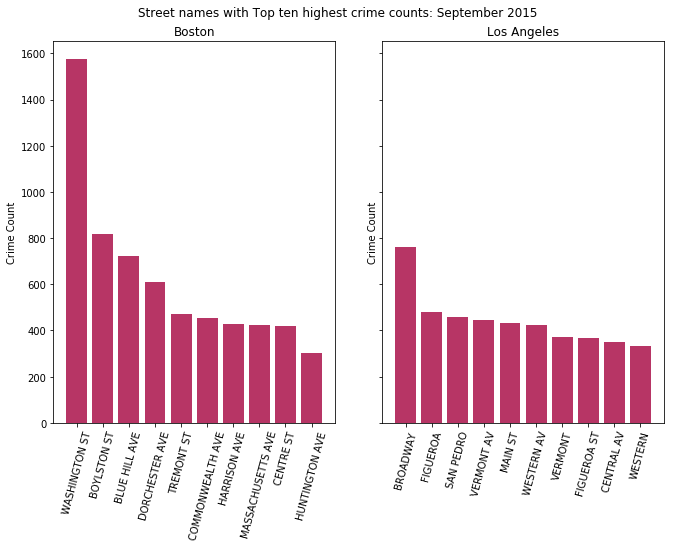

In [51]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True , figsize=(10,8))

# Boston plotting
ax1.bar(BosStreetnames, CountofCrimesBostonStreet, color='#b73565', alpha=1, align="center")
ax1.set_xticklabels(labels= BosStreetnames, rotation=75 , ha = "center")
ax1.set_ylabel("Crime Count")
ax1.set_title("Boston")

# LA plotting

ax2.bar(LAStreetnames, CountofCrimesLAStreet, color='#b73565', alpha=1, align="center")
ax2.set_xticklabels(labels= formattedLAStreetnames, rotation=75 , ha = "center")
ax2.set_ylabel("Crime Count")
ax2.set_title("Los Angeles")

fig.suptitle("Street names with Top ten highest crime counts: September 2015")
fig.tight_layout(pad =3.0)
# Save the image
fig.savefig('Images/Street names with Top ten highest crime counts_September 2015.png')